In [51]:
import pandas as pd
import numpy as np
import os 
import glob
from PIL import Image
import cv2
from pathlib import Path
import torch

RuntimeError: THPDtypeType.tp_dict == nullptr INTERNAL ASSERT FAILED at "/Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/Dtype.cpp":173, please report a bug to PyTorch. 

In [ ]:
path = '/Users/maelynenguyen/Desktop/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation/training'

# Define paths
image_path = os.path.join(path, 'images')
label_path = os.path.join(path, 'groundtruth')



In [28]:
path = '/Users/maelynenguyen/Desktop/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation/training'

# Define paths
image_path = os.path.join(path, 'images')

im1 = '/Users/maelynenguyen/Desktop/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation/training/images/satImage_001.png'

In [30]:
#image = Image.open(im1)
image = cv2.imread(im1)
gray = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)
normalized = gray / 255.0

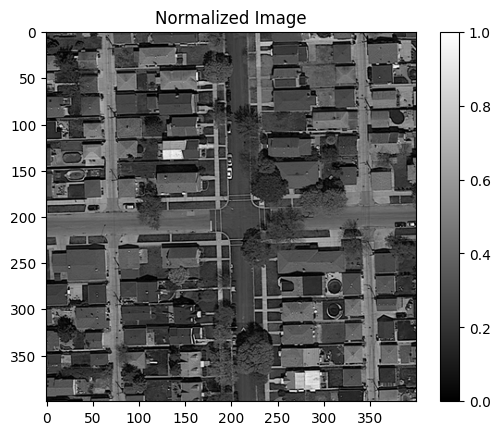

In [32]:
normalized
import matplotlib.pyplot as plt

plt.imshow(normalized, cmap='gray')
plt.colorbar()
plt.title('Normalized Image')
plt.show()

In [ ]:

def label_to_binary_matrix(self, label_path: str, threshold: int = 128) -> np.ndarray:
    """
    Converts a label image to a binary matrix.

    Args:
        label_path (str): Path to the label image.
        threshold (int): Threshold for binarization (0-255). 
                         Pixels >= threshold are set to 1; others are set to 0.

    Returns:
        np.ndarray: Binary matrix of the label.
    """
    label_image = Image.open(label_path).convert("L")  # Convert to grayscale
    label_array = np.array(label_image)
    binary_matrix = (label_array >= threshold).astype(np.uint8)  # Thresholding
    return binary_matrix


In [48]:

class Dataset(torch.utils.data.Dataset):
    def __init__(self, images_dir, labels_dir):

        self.images_dir = Path(images_dir)
        self.labels_dir = Path(labels_dir)

        # Collect image and label paths
        self.image_paths = sorted(list(self.images_dir.glob("*.png")))
        self.label_paths = sorted(list(self.labels_dir.glob("*.png")))
        assert len(self.image_paths) == len(self.label_paths), "Mismatch between image and label files"

        # Preload image and label data
        self.image_data_list = [self.load_image(image_path) for image_path in self.image_paths]
        self.label_data_list = [self.load_image(label_path) for label_path in self.label_paths]

        print(f"Found {len(self.image_paths)} image-label pairs")
        

    def load_image(self, image_path):
        # Load PNG image as a NumPy array
        image = cv2.imread(image_path)
        gray = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)
        normalized = gray / 255.0
        return gray

    def _len_(self):
        return len(self.image_data_list)
    
    def _getitem_(self, index):
        image = self.image_data_list[index]
        label = self.label_data_list[index]
        return image, label
    
    

        


KeyboardInterrupt: 

In [46]:
dataset=Dataset(image_path, label_path)


Found 100 image-label pairs


In [47]:
len(dataset)

TypeError: object of type 'Dataset' has no len()